# Content

### 1) Data understanding
### 2) Data cleaning
###   - Dealing with missing values
###   - Drop special rows( like member id)
###   - Missing values imputation analysis
### 3) Data analysis
###   - Univariate analysis with Outlier analysis
###   - Univaraite segmented analysis
###   - Bivariate analysis
### 4) Information content analysis
### 5) Recommendation
   
   

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [6]:
#Import pandas lib for data manipulation
import pandas as pd
#Import numpy lib scientific calculation
import numpy as np
#Import seaborn and matplot lib for visulaization of plots
import seaborn as sns
import matplotlib.pyplot as plt

## DATA UNDERSTANDING

### Load data and check shape to get number of rows and columns

In [8]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/loan.csv",low_memory=False)
df.shape

(39717, 111)

### So the dataset has 39717 rows and 111 columns.
### Let see some samples

In [10]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking datatype of the variables

In [11]:
# show information on data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### So there are 74 columns of float type, 13 of int type and 24 of object.
### View object type columns to ensure that they are not numeric variables actaully with wrong datatype.

### Displaying all variables of datatype object.

In [12]:
# show all columns that are of type object
df.select_dtypes([object]).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

### The following variables should be actually be numerical:
### i)Term
### ii)int_rate: interest rate
### iii)emp_length:employment length
### iv)zip_code
### v)revol_util: revoving line utilization rate
### So converting them to numeric data type.

### Lets see how term varaible looks like.

In [13]:
df.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

### Now lets see count of each category in term.

In [14]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

### Changing term variable to interger type.

In [15]:
#changing term column to numerical
df.term = df.term.apply(lambda x:int(x[:3]))
df.term

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

### Lets see how interest rates look like.

In [16]:
df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

### We filter out the interest rate by slicing.

In [17]:
df.int_rate = df.int_rate.apply(lambda x:float(x[:-1]))
df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

### Lets see how the employment length variable looks like.

In [18]:
df.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

### Lets see categories in employment length.

In [19]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### We will convert to integer type.
### For easier analysis,we assume  employment length > 10 years will be taken as 10 years while
### less than one year will be treated as one year length.

In [20]:
#Function to convert employment length to integer type. 
def emp_length_fix_datatype(x):
    try:
        # All lengths ablove 10 will be treated as 10
        if x[2] == "+":
            return 10
        #All lengths less than 1 will be treated as 1
        elif x[2] == "1":
            return 1
        else:
            return int(x[0])
    except:
        return x
df.emp_length = df.emp_length.apply(lambda x:emp_length_fix_datatype(x))
df.emp_length.unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### Lets see how employment length categories look like after conversion.

In [21]:
df.emp_length.value_counts()

10.0    8879
1.0     7823
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

### Lets see how zip codes look like.

In [22]:
df.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

### Since last three digits are hidden, they can be removed and convert to integer type.

In [23]:
# Remove xxx characters from zip code to make it int type
df.zip_code = df.zip_code.apply(lambda x:int(x[:3]))
df.zip_code.value_counts()

100    597
945    545
112    516
606    503
70     473
      ... 
381      1
378      1
739      1
396      1
469      1
Name: zip_code, Length: 823, dtype: int64

###  Lets see how revol_util variable looks like.

In [24]:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

### We change it to float type by slicing out the numeric part.

In [25]:
# Function to remove % character from the revol_util
def change_revol_util_to_float(x):
    try:
        return float(x[:-1])
    except:
        return x

df.revol_util = df.revol_util.apply(lambda x: change_revol_util_to_float(x))
df.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

### Checking target variable.
### Now loan_status is our target variable and it is categorical target,
### Lets see the classes in target.

In [26]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# DATA CLEANING

### Lets first check the missing values.


### Checking for missing values percentages of all variables.

In [27]:
# show missing percentage values of all columns
df.isna().sum()*100/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### So there are some columns with very high percentage of missing values( some even missing all values)
### Dropping columns with more than 80% missing values

In [28]:
#drop missing values >0.8
df = df.loc[:, df.isna().sum() < 0.8*len(df)]


### Lets see new shape after dropping columns of high percentage missing values

In [29]:
df.shape

(39717, 55)

### Lets see how many unique values are there in each column.


In [30]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       10
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

### So there are 7 columns with only one unique value.
### These columns can be dropped and useful in analysis as they will be same value irrespective of whether the loan defaults or not.

### Lets recheck using value counts for these columns.

In [31]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [32]:
# Here we are observing count of each value
df.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [33]:
# Here we are observing count of each value
df.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [34]:
# Here we are observing count of each value
df.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [35]:
# Here we are observing count of each value
df.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [36]:
# Here we are observing count of each value
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [37]:
# Here we are observing count of each value
df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [38]:
# Here we are observing count of each value
df.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

### So these columns can be dropped as they the same value for each row so it wont be useful in prediction as it doesnt differentiate between fuuly charged and defaulted loans.

In [39]:
# list of col names of same values
list_same_value = ["pymnt_plan","initial_list_status","application_type","collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens","policy_code"]
#drop these columns
df = df.drop(list_same_value,axis =1)

### Now there are some columns that dont have any useful information for analysis of loan default.
### Some of the columns like url, desc, id,member_id dont influence the default rate.
### So these can be removed as well.

In [40]:
# list of columns
list_no_influence = ["url", "desc", "id","member_id"]
#drop the columns
df = df.drop(list_no_influence,axis =1)

### Now 'loan_amnt','funded_amnt','funded_amnt_inv' are usually correlated. 
### Lets check for the same.

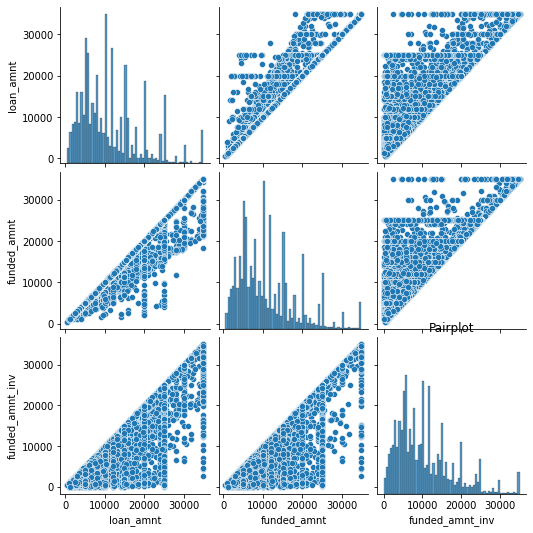

In [41]:
# create dataframe by slicing only required columns
df_1 = df.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']]
#show pair plot
sns.pairplot(df_1)
plt.title("Pairplot")
plt.show()

### So as expected the 3 columns seems to be linearly corelated from the pairplot.

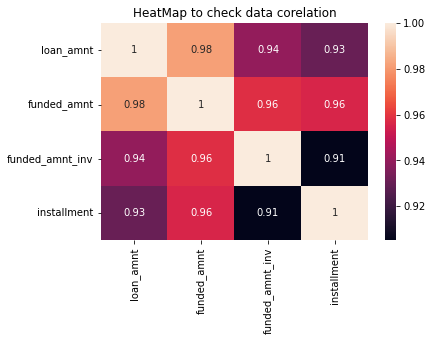

In [42]:
# We are using heatmap to check corelation for these four columns
# create dataframe by slicing only required columns
df_1 = df.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv',"installment"]]
#plot heat map
plt.title("HeatMap to check data corelation")
sns.heatmap(df_1.corr(),annot = True)
plt.show()

### Hence they show high correlation of > 0.9

### Since these four seems to be  highly correlated, we can drop three of them.
### Lets keep loan amount and drop other two.

In [43]:
# create dataframe by slicing only required columns
list_redundant = ["funded_amnt", "funded_amnt_inv","installment"]
# drop corelated columns
df = df.drop(list_redundant,axis =1)

### From issue_d ie issued date, we can get the dereived metric "month".
### The year information wont be useful for future prediction.
### Hence we can get derieved metric "month" and then drop the original variable "issue_d"

In [44]:
# create dervied metric "month" from "issue_d" column
df["month"] =  df.issue_d.apply(lambda x: x[:3])
# drop issue_d col as no longer required.
df = df.drop(["issue_d"],axis =1)

# Null values imputation analysis

### Lets check for number of null values in each column.

In [45]:
df.isna().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

### There are some columns with some missing values:
### emp_title,emp_length,title,mths_since_last_delinq,revol_util,last_pymnt_d,                   last_credit_pull_d,pub_rec_bankruptcies    


### Now lets consider which metric can be used to impute null values.

### Now lets see datatype of these columns.

In [46]:
# create dataframe by slicing only required columns
df_2 = df.loc[:,["emp_title","emp_length","title","mths_since_last_delinq","revol_util","last_pymnt_d","last_credit_pull_d","pub_rec_bankruptcies"]]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   emp_title               37258 non-null  object 
 1   emp_length              38642 non-null  float64
 2   title                   39706 non-null  object 
 3   mths_since_last_delinq  14035 non-null  float64
 4   revol_util              39667 non-null  float64
 5   last_pymnt_d            39646 non-null  object 
 6   last_credit_pull_d      39715 non-null  object 
 7   pub_rec_bankruptcies    39020 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.4+ MB


### emp_title,emp_length,title,revol_util,last_pymnt_d, last_credit_pull_d are categorical variables.
### Hence they can be imputed with corresponding "mode value".

### For numeric variables, lets see their spread

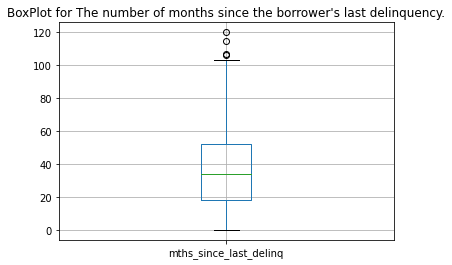

In [47]:
# create dataframe by slicing only required columns
df_3 = df.loc[:,["mths_since_last_delinq"]]
# Create boxplot for variable to see its spread
plt.title("BoxPlot for The number of months since the borrower's last delinquency.")
df_3.boxplot()
plt.show()

### Since it has outliers, hence the median metric should be used for imputation.
### Now check pub_rec_bankruptcies column

In [48]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Since it has only 3 values, it can be imputed using median metric ie most ocurring value.

### Now check is any rows are missing high percentage of values.

### Now lets see percentage of missing values for each row.
### We will drop if percentage is > 80%.

In [49]:
#no rows dropped wrt missing values
df.isnull().sum(axis=1).value_counts()

1    25093
0    12499
2     1427
3      692
4        6
dtype: int64

### Since row wise missing values are low, hence no rows can be dropped.

# DATA ANALYSIS

### Now this dataset include current loans also ie ones where loans are going on. 

### Hence it include customer behaviour variable also ie information based on customer after his loan is approved like last payment date.

### These information are not available at time of loan application. So they are out of scope for this analysis and hence can be dropped.

### These columns are chosen according to the domain knowledge.

### Remove Customer Behaviour variables as they are not available at time of loan application.

In [50]:
# list of customer behaviour variables
list_consumer_behaviour = ['delinq_2yrs', 'earliest_cr_line','out_prncp', 'out_prncp_inv','open_acc','revol_bal', 'revol_util','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'delinq_amnt','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','mths_since_last_delinq','acc_now_delinq','recoveries',"inq_last_6mths","total_acc","collection_recovery_fee"]
#drop these columns
df = df.drop(list_consumer_behaviour,axis =1)

### Now title and purpose both give for what loan was applied.
### Lets see their categories.

In [51]:
df.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [52]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [53]:
df.title.nunique()

19615

### We see that purpose column is better for analysis as title column has similar categories grouped as different categories.

### Example title has categories such Debt Consolidation,Debt Consolidation Loan, Consolidation,debt consolidation which all mean the same.

### Hence we can use purpose column and drop title column.

In [54]:
#drop title column
df = df.drop(["title"],axis =1)

### Now lets see shape of the data now.

In [55]:
df.shape

(39717, 18)

### So there are 18 columns including the target variable.
### Lets see information on these columns.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  int64  
 2   int_rate              39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_title             37258 non-null  object 
 6   emp_length            38642 non-null  float64
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  zip_code              39717 non-null  int64  
 13  addr_state            39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  pub_rec            

### Preparing target variable.
### Now lets seevalue counts of target variable.

In [57]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Since the "current" loans are ongoing loans, they cant be used for prediction as we dont have their ground truth ie they default or not.

### Hence these rows can be dropped

In [58]:
# drop rows where loan status is current
df = df[~(df.loan_status == "Current")]
df.shape

(38577, 18)

### For analysis we have to convert target variable to numerical.

### Hence "Charged off" will be imputed with 1 and "fully_paid" with 0.

In [59]:
#Impute target variable
df.loan_status = df.loan_status.apply(lambda x: 1 if x =="Charged Off" else 0 )

In [60]:
df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

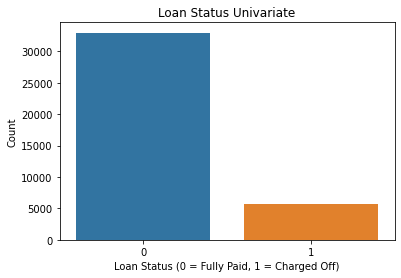

In [61]:
# count of each class in target variable
sns.countplot(x = df.loan_status)
plt.title("Loan Status Univariate")
plt.xlabel('Loan Status (0 = Fully Paid, 1 = Charged Off)')
plt.ylabel('Count')
plt.show()

### We see that there are > 5k datapoints are defaulted loans.

# 1. Univariate Analysis

### Lets see the variables we will consider

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   grade                 38577 non-null  object 
 4   sub_grade             38577 non-null  object 
 5   emp_title             36191 non-null  object 
 6   emp_length            37544 non-null  float64
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  loan_status           38577 non-null  int64  
 11  purpose               38577 non-null  object 
 12  zip_code              38577 non-null  int64  
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  pub_rec            

### We will do outlier analysis along with univariate analysis.

### i)loan amount

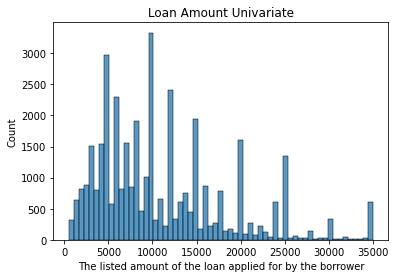

In [63]:
# plot histogram to see the spread
sns.histplot(x = df.loan_amnt)
plt.title("Loan Amount Univariate")
plt.xlabel('The listed amount of the loan applied for by the borrower')
plt.ylabel('Count')
plt.show()

###  We see that loan amount is skewed to lower side ie higher number of people are applying
### for lower amount of loan and vice versa.
### We also peaks at 5k, 10k, 15k etc. Hence more loans are given in multiples of 5k.

### Now lets do outlier analysis for loan amount and see the numerical spread.

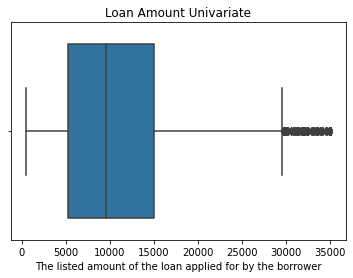

In [64]:
# plot histogram to see the spread
sns.boxplot(x = df.loan_amnt)
plt.title("Loan Amount Univariate")
plt.xlabel('The listed amount of the loan applied for by the borrower')
plt.show()

### We see that there are outlier in the range 30k to 35k and majority of loans are between 5k and 15k.

### ii)Term

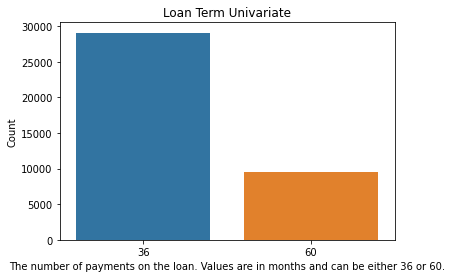

In [65]:
# plot countplot to see distribution among classes
sns.countplot(x = df.term)
plt.title("Loan Term Univariate")
plt.xlabel('The number of payments on the loan. Values are in months and can be either 36 or 60.')
plt.ylabel('Count')
plt.show()

### We see that more people have applied for the shorter term of 36 months.
### This is consistent with fact that more people applied for lower amounts of loan.

### iii) Interest rate

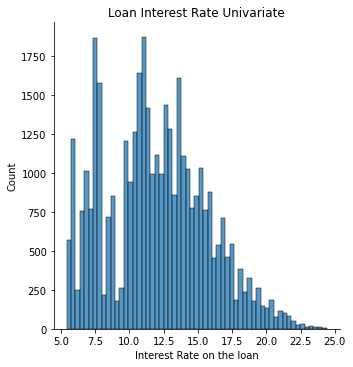

In [66]:
# plot histogram to see the spread
sns.displot(df.int_rate)
plt.title("Loan Interest Rate Univariate")
plt.xlabel('Interest Rate on the loan')
plt.ylabel('Count')
plt.show()

### We see that interest rate are more spread out.
### There is downward trend of number of loans with increase of interest rate.
### This is consistent with trend in loan amount as usually higher loan amounts attract higher interest rates.

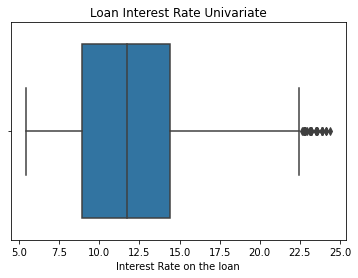

In [67]:
# plot boxplot to see the spread
sns.boxplot(x = df.int_rate)
plt.title("Loan Interest Rate Univariate")
plt.xlabel('Interest Rate on the loan')
plt.show()

### We see ouliers are present in range above 22.5%.

### iv) Employment Length

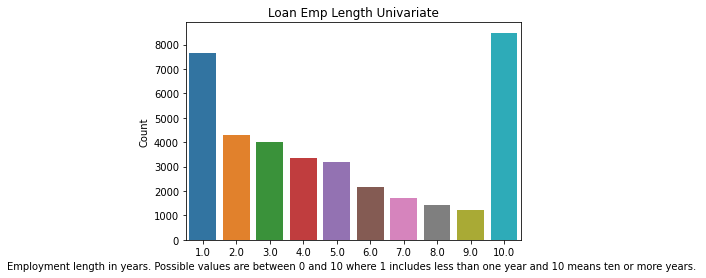

In [68]:
# plot countplot 
sns.countplot(x = df.emp_length)
plt.title("Loan Emp Length Univariate")
plt.xlabel('Employment length in years. Possible values are between 0 and 10 where 1 includes less than one year and 10 means ten or more years. ')
plt.ylabel('Count')
plt.show()

### We see that there is downward trend as employment length increase.
### We also see high peaks for categories 1 and 10 years.
### This could be due to fact that be binned all <1 years to 1 year and all >10 years to 10 years.

### v)annual_income

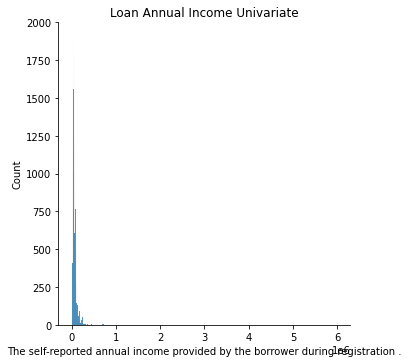

In [69]:
# plot histogram to see the spread
sns.displot(df.annual_inc)
plt.title("Loan Annual Income Univariate")
plt.xlabel('The self-reported annual income provided by the borrower during registration .')
plt.ylabel('Count')
plt.show()

### We see that there are many outliers and majority are less than 50k income.

In [70]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Minimum is 4000 while max is 60k.

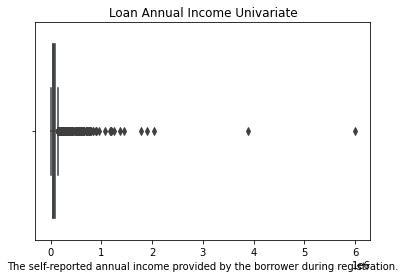

In [71]:
# plot boxplot to see the spread
sns.boxplot(x = df.annual_inc)
plt.title("Loan Annual Income Univariate")
plt.xlabel('The self-reported annual income provided by the borrower during registration.')
plt.show()

### Outliers are present with high income like 40k and 60k.

### vi) Grade

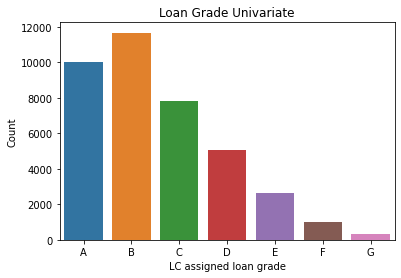

In [72]:
sns.countplot(x = df.grade.sort_values())
plt.title("Loan Grade Univariate")
plt.xlabel('LC assigned loan grade')
plt.ylabel('Count')
plt.show()

### This shows that more loans are given in least risk grade A and increases as risk category
### increases to G.

### vii)Purpose

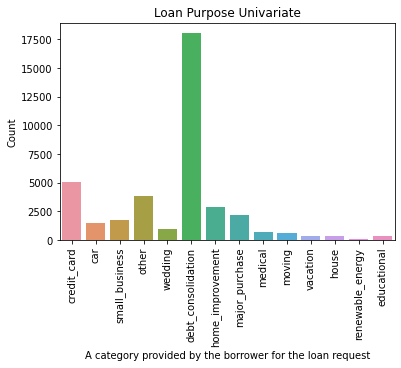

In [73]:
sns.countplot(x = df.purpose)
plt.title("Loan Purpose Univariate")
plt.xlabel('A category provided by the borrower for the loan request')
plt.ylabel('Count')
plt.xticks(rotation =90)
plt.show()

### We see that more people apply for loans for purposes of debt consolidation and credit cards while less
### people apply for renewable energy and education.

### viii) Home ownership

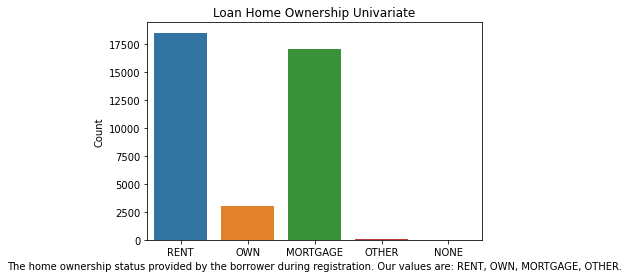

In [74]:
sns.countplot(x = df.home_ownership)
plt.title("Loan Home Ownership Univariate")
plt.xlabel('The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.')
plt.ylabel('Count')
plt.show()

### We see that people with houses on rent or mortage apply for most loans while people with own house apply for less loans.

### ix) Employment title

In [75]:
df.emp_title.nunique()

28027

In [76]:
df.emp_title.value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

### We see that there are over 28k employment titles and highest being US Army and Bank of America

### x) Verification status

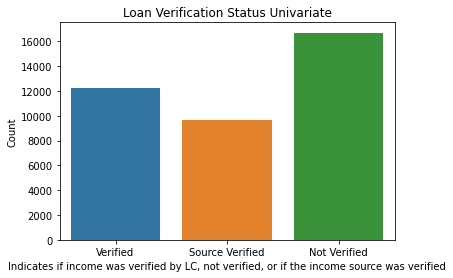

In [77]:
sns.countplot(x = df.verification_status)
plt.title("Loan Verification Status Univariate")
plt.xlabel('Indicates if income was verified by LC, not verified, or if the income source was verified')
plt.ylabel('Count')
plt.show()

### We see most people applying for loan are not verified and least being source verified.

### xi) Month of the year

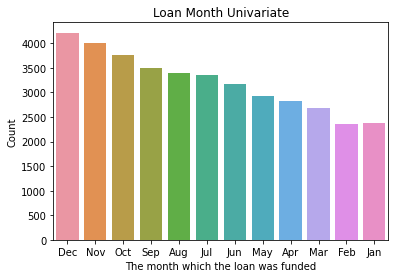

In [78]:
sns.countplot(x = df.month)
plt.title("Loan Month Univariate")
plt.xlabel('The month which the loan was funded')
plt.ylabel('Count')
plt.show()

### We see that loan applications increase from January to December.

### xii)number of public debt bankruptcies

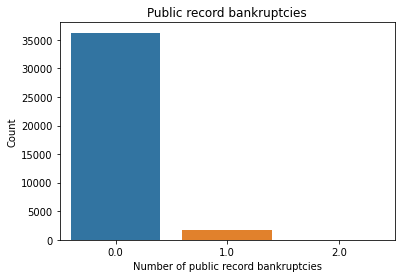

In [79]:
sns.countplot(x = df.pub_rec_bankruptcies)
plt.title("Public record bankruptcies")
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count')
plt.show()

### We see that most loans are given if person has no public bankruptcies
### while few are given to people with one , it is rare for people with 2 public bankruptcies.

### xiii) Zip code

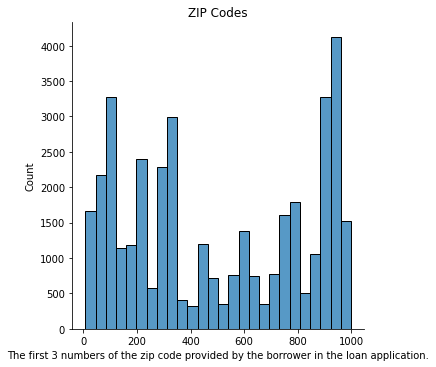

In [80]:
sns.displot(x = df.zip_code)
plt.title("ZIP Codes")
plt.xlabel('The first 3 numbers of the zip code provided by the borrower in the loan application.')
plt.ylabel('Count')
plt.show()

### We see that people at higher and lower end of zipcode apply for more loans.

### xiv) Address state

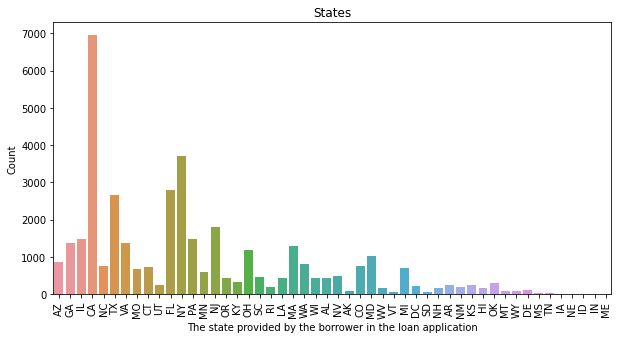

In [81]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df.addr_state)
plt.title("States")
plt.xlabel('The state provided by the borrower in the loan application')
plt.ylabel('Count')
plt.xticks(rotation =90)
plt.show()

### We see that people from states like CA and NY get more loans while those from ME, IN get least.

### xv) Debt to income ratio(dti)

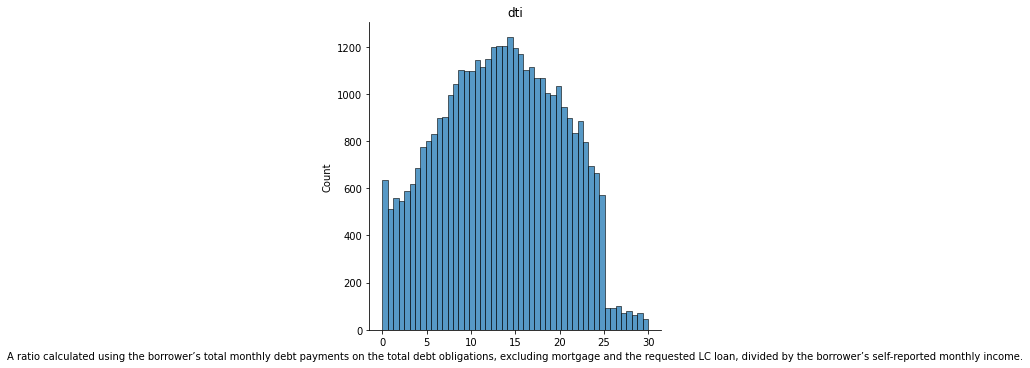

In [82]:
sns.displot(df.dti)
plt.title("dti")
plt.xlabel('A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.')
plt.ylabel('Count')
plt.show()

### We see that people with moderate dti get loans while those above 25% dti get less loans.

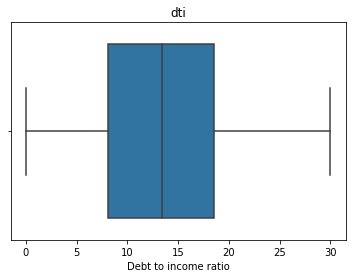

In [83]:
sns.boxplot(x = df.dti)
plt.title("dti")
plt.xlabel('Debt to income ratio')
plt.show()

### We see that no outliers are present for debt to income ratio.

### xvi)Number of derogatory public records

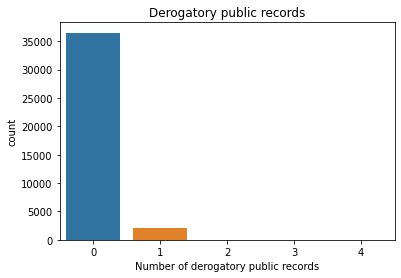

In [84]:
sns.countplot(x = df.pub_rec)
plt.title("Derogatory public records")
plt.xlabel('Number of derogatory public records')
plt.show()

### We see that it gets difficult to get loan if there are derogatory public records for a person but few with one record also get loans.

## Outlier Removal Analysis

### We see that the following columns have outliers.
- annual_inc, int_rate, loan_amnt.

### They can be removed using inter quartile range(IQR) as follows.

### Q3 = np.percentile(0.75)
### Q1 = np.percentile(0.75)
### IQR = Q3-Q1
### lower_range = Q1 - 1.5*IQR
### higher_range = Q3 +1.5*IQR

### df_without_outliers = [(df["annual_inc"] < lower_range) | (df["annual_inc"] > upper_range)\



## Univariate with segmented

### We will also be considering the information content of each column wrt default rate.
### It will tell us how much difference in values it has between defaulted and nondefaulted loans.
### The larger the difference in values , larger is its information content.

### We will use a function to compute information content of each column and use it during univariate segment analysis.
### It is tell which columns should get higher priority and most effect on loan status.

In [85]:
# Global dictionary that store information values
dict_info = {}
def get_info_content(plot):
    list_bar_values = []
    #Get height of each bar in barplots
    for i in plot.patches:
        list_bar_values.append(float('{:.2f}'.format(i.get_height())))
    #Return difference between highest and smallest bars in the plot
    # and the highest and lowest values
    high = max(list_bar_values)
    low = min(list_bar_values)
    info = max(list_bar_values) - min(list_bar_values)  
    info = float('{:.2f}'.format(info))
    high = float('{:.2f}'.format(high))
    low = float('{:.2f}'.format(low))
    return info,high,low 

### For segemnted analysis, we will convert numeric cols to categorical using binning.

In [86]:
# Binning categorical features
df['loan_amnt_bin'] = pd.cut(x=df['loan_amnt'], bins=[0,5000, 9600, 35000],
                    labels=['Low', 'Medium', 'High'])

df['annual_inc_bin'] = pd.cut(x=df['annual_inc'], bins=[0,40000, 50000, 6000000.0],
                    labels=['Low', 'Medium', 'High'])
                            
df['int_rate_bin'] = pd.cut(x=df['int_rate'], bins=[0,8, 12, 25],
                    labels=['Low', 'Medium', 'High'])
df['zip_code_bin'] = pd.cut(x=df['zip_code'], bins=[0,201, 452, 1000],
                    labels=['Low', 'Medium', 'High'])
df["dti_bin"] = pd.cut(x=df['dti'], bins=[0,10, 20, 30],
                    labels=['Low', 'Medium', 'High'])

### Checking if all categorical are binned into numeric type.

In [87]:
df_1 = df.loc[:,["loan_amnt_bin","annual_inc_bin","int_rate_bin","zip_code_bin","dti_bin"]]
df_1.head()

,loan_amnt_bin,annual_inc_bin,int_rate_bin,zip_code_bin,dti_bin
0,Low,Low,Medium,High,High
1,Low,Low,High,Medium,Low
2,Low,Low,High,High,Low
3,High,Medium,High,High,Medium
5,Low,Low,Low,High,Medium


### i) Loan amount

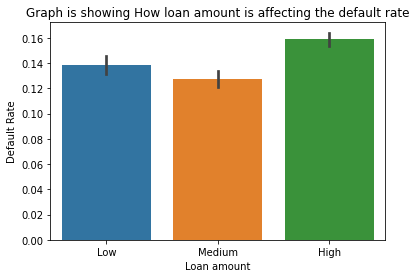

In [88]:
# barplot show default rate across loan amount bins
p = sns.barplot(x = df.loan_amnt_bin,y=df.loan_status)
plt.title("Graph is showing How loan amount is affecting the default rate")
plt.xlabel('Loan amount')
plt.ylabel('Default Rate')
# update information content dictionary
info = get_info_content(p)
dict_info.update({"Loan amount": info })
plt.savefig("loan_amnt.jpg")

### Insight:
#### Default rate is comparatively high for higher loan amounts

### Recommendation:
#### When giving loans of higher amount, we should be cautious as default rate is more.



### ii)Term


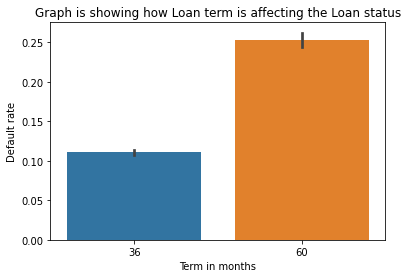

In [89]:
# barplot show default rate across term bins
p = sns.barplot(x = df.term,y=df.loan_status)
plt.title("Graph is showing how Loan term is affecting the Loan status")
plt.xlabel('Term in months')
plt.ylabel('Default rate')
# update information content dictionary
info = get_info_content(p)
dict_info.update({"term": info })
plt.savefig("term.jpg")

### Insight:
#### Default rate is comparatively high for higher term of 60 months.
#### For loans at higher term default rate is almost 15% than those of shorter term.

### Recommendation:
#### Loans at shorter term(3 years) should be preferred over longer term. 
#### The term of 36 months should be given as default option to reduce loans in 60 months term.

### iii) Interest Rate

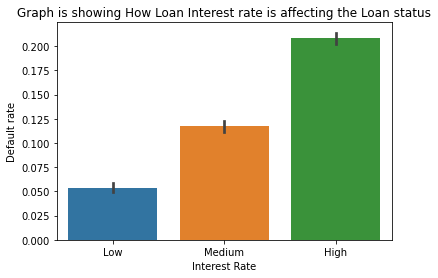

In [90]:
# barplot show default rate across interest rate bins
p = sns.barplot(x = df.int_rate_bin,y=df.loan_status)
plt.title("Graph is showing How Loan Interest rate is affecting the Loan status")
plt.xlabel('Interest Rate')
plt.ylabel('Default rate')
# update information content dictionary
info = get_info_content(p)
dict_info.update({"Interest rate": info })
plt.savefig("ir.jpg")

### Insight:
#### Default rate rises as the interest rate rises.

### Recommendation:
#### Loans at higher interest rate have higher chance of defaulting. 
#### Interest rate till 12% is acceptable but anything above %12 should be restricted as it result in default rate of 20%
#### But this can reduce profits from interest receipts hence as a tradeoff medium interest rate of 8-12% can be suggested which have considerably lower 11% default rate. 

### iv) Grade

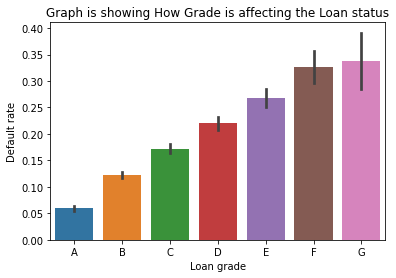

In [91]:
# barplot show default rate across grade
p = sns.barplot(x = df.grade.sort_values(),y = df.loan_status)
plt.title("Graph is showing How Grade is affecting the Loan status")
plt.xlabel('Loan grade')
plt.ylabel('Default rate')
# update information content dictionary
info = get_info_content(p)
dict_info.update({"Grade": info })
plt.savefig("grade.jpg")

### Insight:
#### Default rate increases as the risk grade increase.
#### Moving from grade E to B reduce default rate by 12%

### Recommendation:
#### Higher risk grades(above E) should be avoided as they have higher chance of defaulting.
#### Grades F and G strictly to be avoided as default rate is above 30%.

### v) Sub Grade

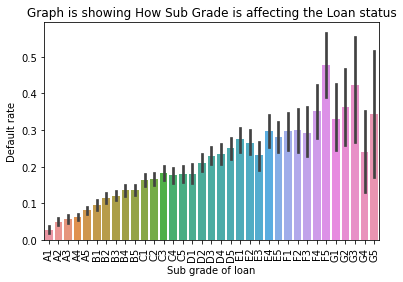

In [92]:
# barplot show default rate across subgrade
p = sns.barplot(x=df.sub_grade.sort_values(),y=df.loan_status)
plt.title("Graph is showing How Sub Grade is affecting the Loan status")
plt.xlabel('Sub grade of loan')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"sub_grade": info })
plt.xticks(rotation =90)
plt.savefig("subgrade.jpg")
plt.show()

### Insight:
#### Default rate is increases as the subgrade increases within a grade.
#### The different pattern for grade G should be neglected as it has lower samples for analysis as
#### seen from its error rate.

### Recommendation:
#### When giving loans, lower subgrade loans should be promoted within a grade.

vi) Employment length

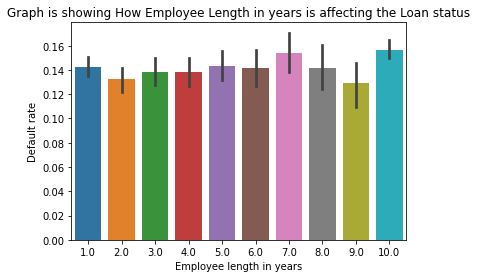

In [93]:
# barplot show default rate across employment length
p = sns.barplot(x = df.emp_length, y=df.loan_status)
plt.title("Graph is showing How Employee Length in years is affecting the Loan status")
plt.xlabel('Employee length in years')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"Employment length": info })
plt.savefig("emp_length.jpg")

#### Insight:
### There is no much difference in default rate across different employment lengths.

### Recommendation:
#### None

### vii) Annual income

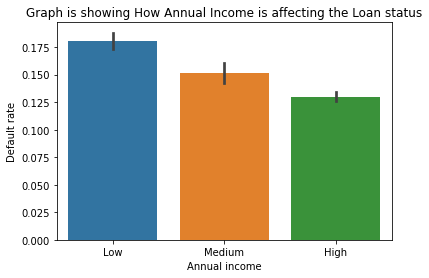

In [94]:
# barplot show default rate across annual income bins
p = sns.barplot(x = df.annual_inc_bin, y=df.loan_status)
plt.title("Graph is showing How Annual Income is affecting the Loan status")
plt.xlabel('Annual income')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"annual_inc": info })
plt.savefig("income.jpg")

### Insight:
#### Default rate is higher among people of lower annual income.

### Recommendation:
#### When giving loans to people of lower annual income, we should be cautious.

### viii) Zip code

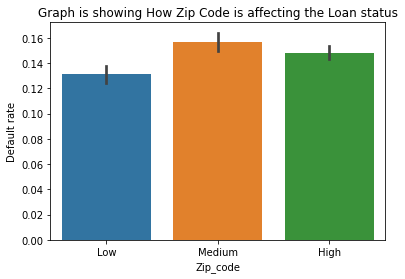

In [95]:
# barplot show default rate across zipcode bins
p = sns.barplot(x = df.zip_code_bin, y=df.loan_status)
plt.title("Graph is showing How Zip Code is affecting the Loan status")
plt.xlabel('Zip_code')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"zip_code": info })
plt.savefig("zip_code.jpg")

### Insight:
#### Default rate doesnt show much difference across zip codes.

### Recommendation:
### None

### ix) Purpose of loan

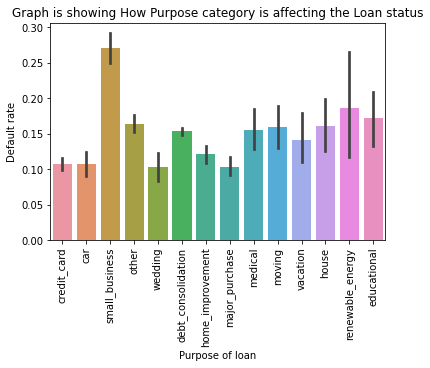

In [96]:
# barplot show default rate across purpose
p = sns.barplot(x = df.purpose, y=df.loan_status)
plt.title("Graph is showing How Purpose category is affecting the Loan status")
plt.xlabel('Purpose of loan')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"purpose": info })
plt.xticks(rotation = 90)
plt.savefig("purpose.jpg")
plt.show()

### Insight:
#### Default rate is highest for small business loans and lowest for categories like cars.
#### This is a good indictor of default as default rate is almost double of other categories.

### Recommendation:
#### Among purposes, small business loans should be restricted (>25% default rate) and promote low defaulting purposes like credit card and car(close to 10% default rate)


### x) Verification status

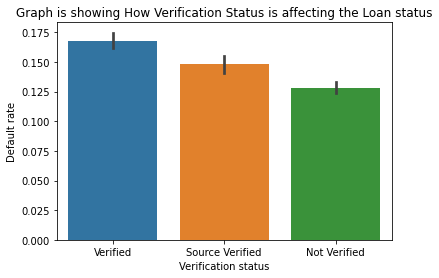

In [97]:
# barplot show default rate across verification status
p = sns.barplot(x = df.verification_status, y=df.loan_status)
plt.title("Graph is showing How Verification Status is affecting the Loan status")
plt.xlabel('Verification status')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"verification status": info })
plt.savefig("verify.jpg")
plt.show()

### Insight:
#### Default rate is lowest when not verified. This goes against popular belief.
#### But since the difference is rate is low(<0.05), verification status cannot be taken as driving factor of default.



### xi) Month of the year

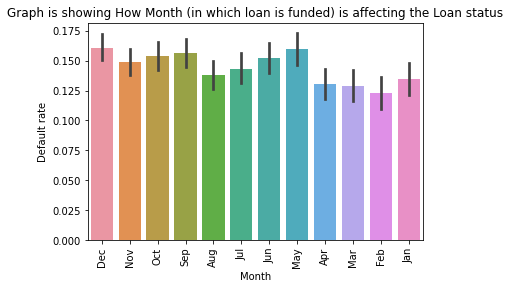

In [98]:
# barplot show default rate across months
p = sns.barplot(x = df.month, y=df.loan_status)
plt.title("Graph is showing How Month (in which loan is funded) is affecting the Loan status")
plt.xlabel('Month')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"month": info })
plt.xticks(rotation = 90)
plt.savefig("month.jpg")
plt.show()

### Insight:
#### Default rate is almost similar across months. Hence not driving factor of default.


### xii) Address state

In [99]:
df.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### Since no of states are high and some states have very low data samples,
### we will use the top 20 states with highest no of samples for analysis.

In [100]:
#slicing out only data of top 20 states count wise
top_12_addr_state = (list(df.addr_state.value_counts().index))[:20]
df_4 = df[df.addr_state.isin(top_12_addr_state)]

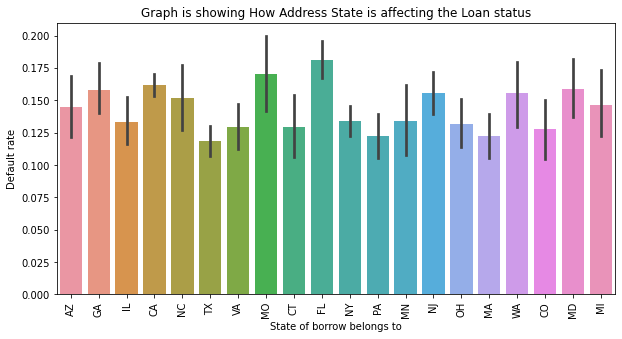

In [101]:
# barplot show default rate across states
plt.figure(figsize=(10, 5))
p = sns.barplot(x = df_4.addr_state, y=df_4.loan_status)
plt.title("Graph is showing How Address State is affecting the Loan status")
plt.xlabel('State of borrow belongs to')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"addr_state": info })
plt.xticks(rotation =90)
plt.savefig("state.jpg")
plt.show()

### Insight:
#### Default rate is similar across different states and hence not a driving factor.


### xiii) Employment title

In [102]:
df.emp_title.value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

### Here also no of categories are huge ie >28k. Hence we will use top 30 categories by count.

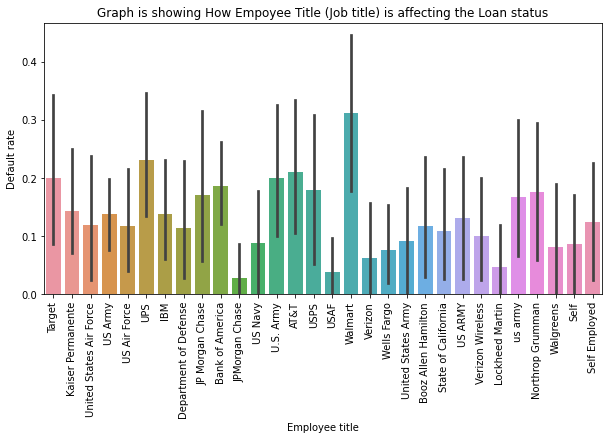

In [103]:
# Slicing data of onlt top 30 categories of emp title
top_emp_title = (list(df.emp_title.value_counts().index))[:30]
df_4 = df[df.emp_title.isin(top_emp_title)]
plt.figure(figsize=(10, 5))

# barplot show default rate across employment title
p = sns.barplot(x = df_4.emp_title, y=df_4.loan_status)

plt.title("Graph is showing How Empoyee Title (Job title) is affecting the Loan status")
plt.xlabel('Employee title')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"emp_title": info })
plt.xticks(rotation =90)
plt.savefig("emp_title.jpg")
plt.show()

### Insight:
#### Though there is variation in default rate among emp titles, error line are quite high for all.
#### This is because most of them have very few data points for analysis(<100 mostly).
#### Hence no correct insight can be made.


### xiv) Home ownership

In [104]:
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### We see that OTHER and NONE have very few samples and will give higherror rate during analysis. Hence removing them for analysis.

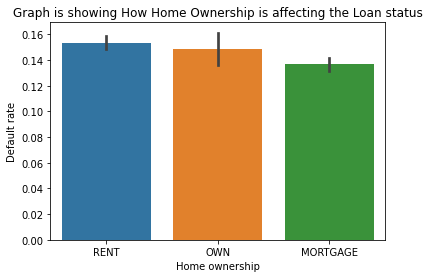

In [105]:
#We can remove the non countable value compare to other
list_home_ownership = ["RENT","OWN","MORTGAGE"]
df_5 = df[df.home_ownership.isin(list_home_ownership)]

p = sns.barplot(x = df_5.home_ownership, y=df_5.loan_status)

# barplot show default rate across home ownership
plt.title("Graph is showing How Home Ownership is affecting the Loan status")
plt.xlabel('Home ownership')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"home_ownership": info })
plt.savefig("home.jpg")

### Insight:
#### No considerable difference in default rate across categories.
#### Hence not a driving factor.

### Recommendation:
#### None

### xv) Debt to income ratio


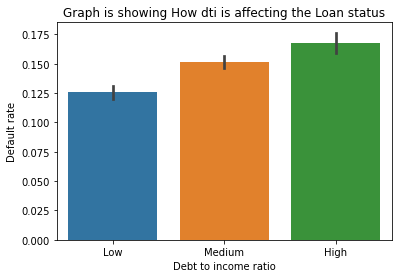

In [106]:
# dti and Loan Status 
# dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
#       excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

# # barplot show default rate across dti bins
p = sns.barplot(x = df.dti_bin, y=df.loan_status)
plt.title("Graph is showing How dti is affecting the Loan status")
plt.xlabel('Debt to income ratio')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"dti": info })
plt.savefig("dti.jpg")

### Insight:
#### Default rate increase as dti increases

### Recommendation:
#### Borrowers with higher debt to income ratio are more likely to default (about 17%)
#### Hence loans be approved only for people with low debt to income in range less than 10% dti.

### xvi) no of public derogatory records

In [107]:
df.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

### Since samples for categories 2,3,4 are very low, we remove them for better analysis.

In [108]:
# slice out those with less than or equal to 1 derogatory public records
df_1 = df[df.pub_rec<=1]

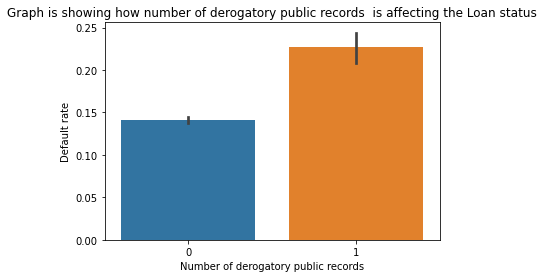

In [109]:
# barplot show default rate across derogatory records count
p = sns.barplot(x = df_1.pub_rec, y=df_1.loan_status)
plt.title("Graph is showing how number of derogatory public records  is affecting the Loan status")
plt.xlabel('Number of derogatory public records')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"pub_rec": info })
plt.savefig("pub_rec.jpg")

### Insight:
#### Default rate is higher for more derogatory public records.

### Recommendation:
#### Avoid giving loans to people with derogatory public records.
#### People with zero derogatory public record should be preferred and those with even one maybe avoided as their default rate is 22%. 

### xvii) no of public bankruptcies

In [110]:
df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

### Removing category 2 as it has very few samples for better analysis.

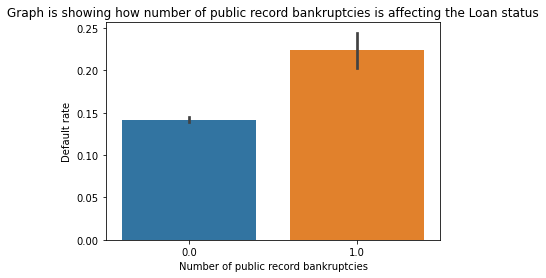

In [111]:
df_1 = df[df.pub_rec_bankruptcies<=1]
# barplot show default rate across bankruptcies
p = sns.barplot(x = df_1.pub_rec_bankruptcies, y=df_1.loan_status)
plt.title("Graph is showing how number of public record bankruptcies is affecting the Loan status")
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Default rate')
info = get_info_content(p)
dict_info.update({"pub_rec_bankruptcies": info })
plt.savefig("pub_bankrupt.jpg")

### Insight:
#### Default rate is higher among people with more public bankruptcies.

### Recommendation:
#### Avoid giving loans to people of more public bankruptcies.

# 2. Bivariate Analysis

### i) Interest rate and loan amount

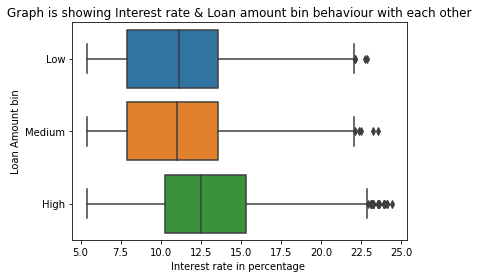

In [112]:
# show relation between two variable using plot
sns.boxplot(x=df.int_rate, y=df.loan_amnt_bin)
plt.title("Graph is showing Interest rate & Loan amount bin behaviour with each other")
plt.xlabel('Interest rate in percentage ')
plt.ylabel('Loan Amount bin')
plt.show()

### From boxplot, we can see that higher the loan amount, higher is the interest charged,

### Now lets see how they relate with default rate.

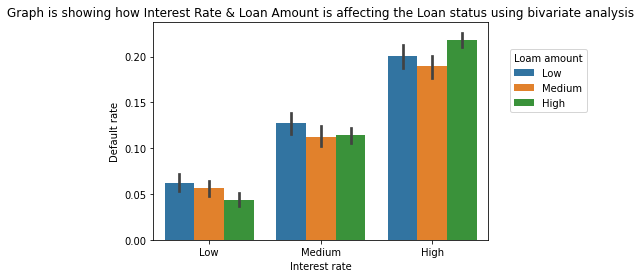

In [113]:
# Bivariate Interest rate & Loan amount bin with Target variable Loan Status
p = sns.barplot(x = df.int_rate_bin,y=df.loan_status, hue=df.loan_amnt_bin)
plt.title("Graph is showing how Interest Rate & Loan Amount is affecting the Loan status using bivariate analysis")
plt.xlabel('Interest rate')
plt.ylabel('Default rate')
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Loam amount")
info = get_info_content(p)
dict_info.update({"int_rate + loan_amnt_bin": info })
plt.savefig("loan amt + interest rate")
plt.show()

### Insight:
#### We can see that as interest rate increases, the default rate also increases for all loan amounts.
#### Default rate is highest when high loan amounts are charged at higher interest rate.

### Recommendation:
#### To to reduce default rate in high loan amounts (>35k) should be given at low interest rate(<8%) as default rate is low and less than 5%. 
#### As a tradeoff for better interest receipts, high loan amounts (>35k) should be given at medium interest rate(8-12%) as default rate is low and less than 5%. 

### ii) Loan amount and purpose of loan

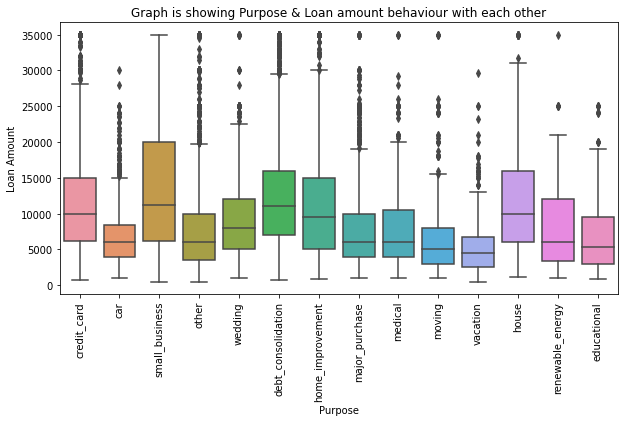

In [114]:
plt.figure(figsize=(10, 5))
p = sns.boxplot(x = df.purpose, y = df.loan_amnt)
plt.title("Graph is showing Purpose & Loan amount behaviour with each other")
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation =90)
plt.show()

### We can see that higher loan amounts are given for small business while purposes like car and vacation get lower loan amounts.

### Now lets see how they relate with default rate.

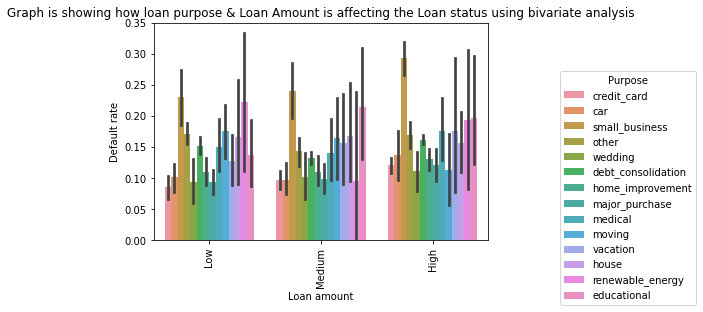

In [115]:
# Bivariate Loan purpose & Loan amount bin with Target variable Loan Status

p = sns.barplot(x = df.loan_amnt_bin,y=df.loan_status, hue=df.purpose)
plt.title("Graph is showing how loan purpose & Loan Amount is affecting the Loan status using bivariate analysis")
plt.xlabel('Loan amount')
plt.ylabel('Default rate')
plt.legend(bbox_to_anchor =(1.2,0.8), title = "Purpose")
plt.xticks(rotation =90)
info = get_info_content(p)
dict_info.update({"loan_amnt_bin + purpose": info })
plt.savefig("loan_amnt_bin + purpose.jpg")
plt.show()

### Insight:
#### We can see that default rate is higher than usual(close  to30%) when higher loan amt given for small business.

### Recommendation:
#### Hence small business should be given only low or medium amount of loan to reduce defaults.

### iii) interest rate and purpose

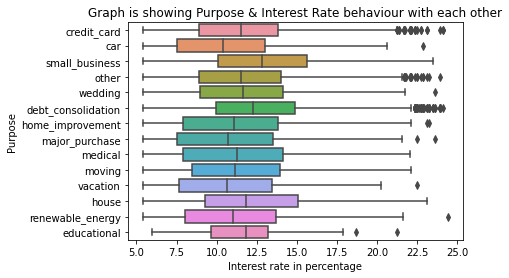

In [116]:
p = sns.boxplot(x = df.int_rate, y = df.purpose)
plt.title("Graph is showing Purpose & Interest Rate behaviour with each other")
plt.xlabel('Interest rate in percentage')
plt.ylabel('Purpose')
plt.show()

### We can see that higher interest rate is applied to categories like small business and house while lower interest rate is offered for loans for cars and vacation.

### Now lets see how they relate with default rate.

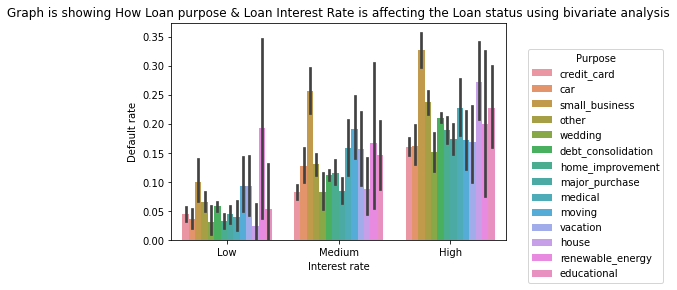

In [117]:
# Bivariate Interest Rate & Loan purpose bin with Target variable Loan Status

p = sns.barplot(x = df.int_rate_bin,y=df.loan_status, hue=df.purpose)
plt.title("Graph is showing How Loan purpose & Loan Interest Rate is affecting the Loan status using bivariate analysis")
plt.xlabel('Interest rate')
plt.legend(bbox_to_anchor =(1.05,0.9),title = "Purpose")
plt.ylabel("Default rate")
info = get_info_content(p)
dict_info.update({"int_rate_bin + purpose": info })
plt.savefig("int_rate_bin + purpose.jpg")
plt.show()

### Insight:
#### Here we can see that small business loans have highest default rate among all categories while default rate increases as interest rate increase across all categories of purpose.
#### So when small business loans are given at high interest rate, the default rate is highest.
#### Educational loans even at low interest rate show high default rate in the plot.
#### But since it also has high error line due to lower data points, it is neglected in analysis.
 
### Recommendation:
#### So for higer profit from interest recepits, at trade off can be reached if for small business loans are given at lower interest rate                while medium interest rate can be charged for other categories of purpose.

### iv) Loan amount and grade

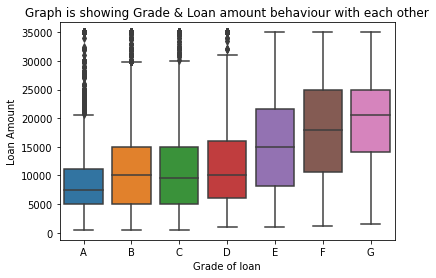

In [118]:
p = sns.boxplot(x = df.grade.sort_values(), y=df.loan_amnt)
plt.title("Graph is showing Grade & Loan amount behaviour with each other")
plt.xlabel('Grade of loan')
plt.ylabel('Loan Amount')
plt.show()

### We can see that higher loan amounts are given when grade increases.

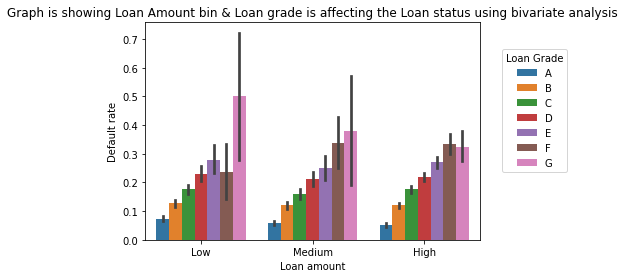

In [119]:
# Bivariate Loan amount bin & Loan grade with Target variable Loan Status

p = sns.barplot(x = df.loan_amnt_bin,y=df.loan_status, hue=df.grade.sort_values())
plt.title("Graph is showing Loan Amount bin & Loan grade is affecting the Loan status using bivariate analysis")
plt.xlabel("Loan amount")
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Loan Grade")
info = get_info_content(p)
dict_info.update({"loan_amnt_bin + grade": info })
plt.savefig("loan_amnt_bin + grade.jpg")

### Insight:
#### Default rate is more for more riskier grade.

### Recommendation
#### High loan amounts (> 35k)in risky grades should be strictly avoided as they have one of the highest rate of default.For example, high loan amounts to grade F result in default rate  of more than 30%.

### v) Term and annual income

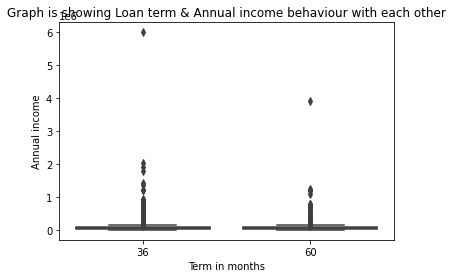

In [120]:
sns.boxplot(x = df.term, y = df.annual_inc)
plt.title("Graph is showing Loan term & Annual income behaviour with each other")
plt.xlabel('Term in months')
plt.ylabel('Annual income')
plt.show()

### There are outliers in annual income. 

In [121]:
df.annual_inc.describe(percentiles = [0.95])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
50%      5.886800e+04
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

### So 95 percenatage of data points of annual income falls under 1.5 lakh.
### hence removing outliers.

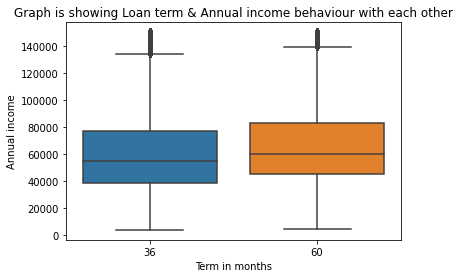

In [122]:
df_2 = df[df.annual_inc <= 150000]
sns.boxplot(x=df_2.term, y=df_2.annual_inc)
plt.title("Graph is showing Loan term & Annual income behaviour with each other")
plt.xlabel('Term in months')
plt.ylabel('Annual income')
plt.show()

### We can see that people with higher annual income are offered loan at longer term ie 60 months.
#### Now lets see how they relate with loan default rate.

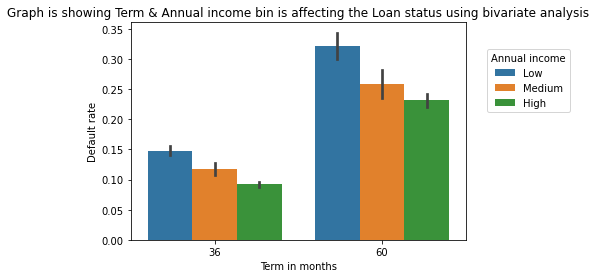

In [123]:
# Bivariate Loan term & annual income bin with Target variable Loan Status

p = sns.barplot(x = df.term,y=df.loan_status, hue=df.annual_inc_bin)
plt.title("Graph is showing Term & Annual income bin is affecting the Loan status using bivariate analysis")
plt.xlabel('Term in months')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9),title = "Annual income")
info = get_info_content(p)
dict_info.update({"term + annual_inc_bin": info })
plt.savefig("term + annual_inc_bin")

### Insight:
#### We see that default rate is high(>30%)when people with low annual income are given higher term.

### Recommendation":
#### Longer term loans (5 years)  should be avoided  for borrowers with lower annual income of less than 40k as they result in default rate of 32%.

### vi) Term and Purpose

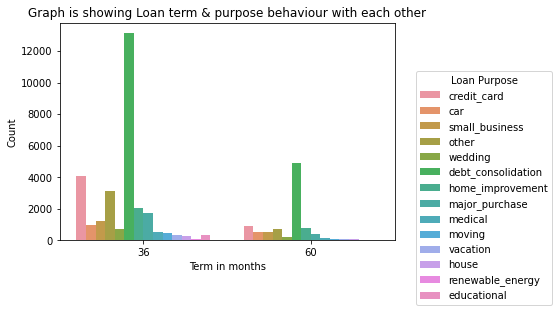

In [124]:
sns.countplot(x='term',hue='purpose',data=df)
plt.legend(bbox_to_anchor = (1.05,0.8), title = "Loan Purpose")
plt.title("Graph is showing Loan term & purpose behaviour with each other")
plt.xlabel('Term in months')
plt.ylabel('Count')
plt.show()

### We see that more people have applied for shorter term especially for credit card and small business.

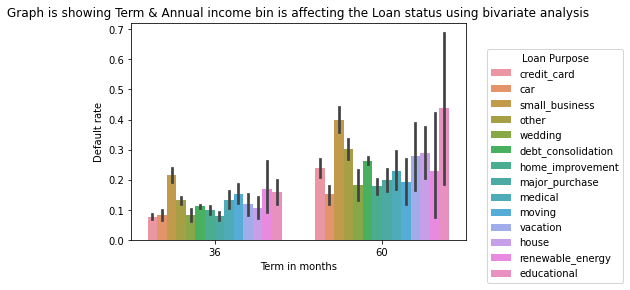

In [125]:
# Bivariate Loan term & annual income bin with Target variable Loan Status

p = sns.barplot(x = df.term,y=df.loan_status, hue=df.purpose)
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Loan Purpose")
plt.title("Graph is showing Term & Annual income bin is affecting the Loan status using bivariate analysis")
plt.xlabel('Term in months')
plt.ylabel("Default rate")
info = get_info_content(p)
dict_info.update({"term + purpose": info })
plt.savefig("term + purpose.jpg")
plt.show()

### Insight:
#### We see that high default rate for small business loans offered at longer term.

### Recommendation:
#### Hence to reduce defaults, small business loans should be given at lower term of 36 months.

### vii) Loan amount and term

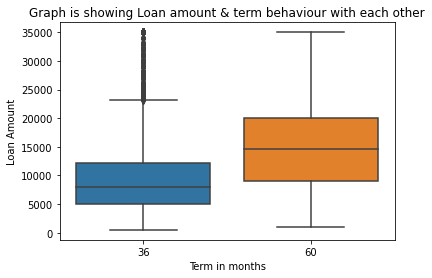

In [126]:
sns.boxplot(x=df.term, y=df.loan_amnt)
plt.title("Graph is showing Loan amount & term behaviour with each other")
plt.xlabel('Term in months')
plt.ylabel("Loan Amount")
plt.show()

### We see that higher loan amounts attracts higher term.
### Lets see how they relate with default rate.

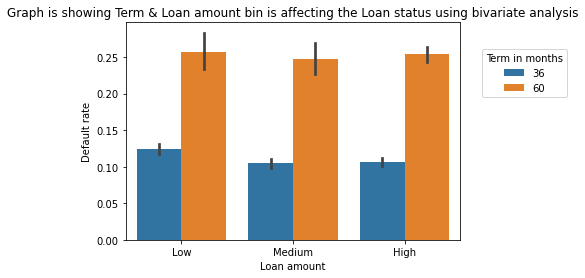

In [127]:
# Bivariate Loan amount bin & term with Target variable Loan Status

p = sns.barplot(x = df.loan_amnt_bin,y=df.loan_status, hue=df.term)
plt.title("Graph is showing Term & Loan amount bin is affecting the Loan status using bivariate analysis")
plt.xlabel('Loan amount')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Term in months")
info = get_info_content(p)
dict_info.update({"loan amount + purpose": info })
plt.savefig("loan amount + purpose.jpg")
plt.show()

### Insight:
#### No insights can be inferred as default rate is similar across all categories of loan amount wrt term

### viii) Term and interest rate

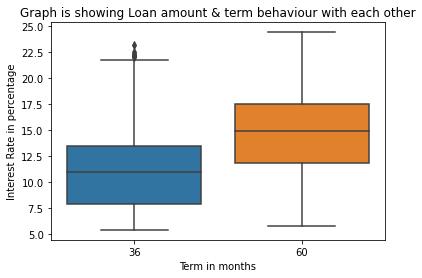

In [128]:
sns.boxplot(x=df.term, y=df.int_rate)
plt.title("Graph is showing Loan amount & term behaviour with each other")
plt.xlabel('Term in months')
plt.ylabel("Interest Rate in percentage")
plt.show()

### We see that higher interest rate is given when term is longer.
### Now lets see how they relate with default rate.

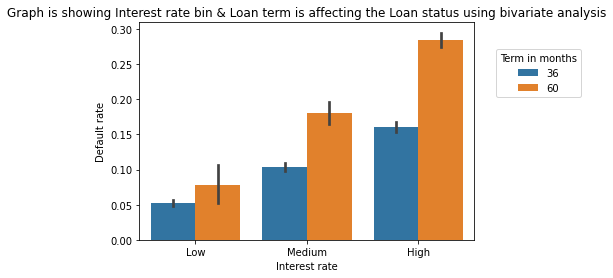

In [129]:
# Bivariate Interest rate & term with Target variable Loan Status

p = sns.barplot(x = df.int_rate_bin,y=df.loan_status, hue=df.term)
plt.title("Graph is showing Interest rate bin & Loan term is affecting the Loan status using bivariate analysis")
plt.xlabel('Interest rate')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Term in months")
info = get_info_content(p)
dict_info.update({"int_rate_bin + term": info })
plt.savefig("int_rate_bin + term")
plt.show()

### Insight:
#### We see that default rate increase across both terms as the interest rate increases.

### Recommendation:
#### Hence for higher term, low or medium interest rate should be given to reduce defaults.

### ix) Interest rate and grade

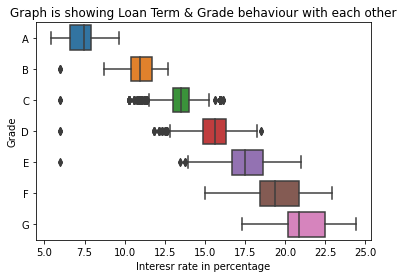

In [130]:
sns.boxplot(x=df.int_rate, y=df.grade.sort_values())
plt.title("Graph is showing Loan Term & Grade behaviour with each other")
plt.xlabel('Interesr rate in percentage')
plt.ylabel("Grade")
plt.show()

### We see that higher interest rate are applied as the grade increases.
### This is consistent with the fact that risk of loan increases as grade moves from A to G.

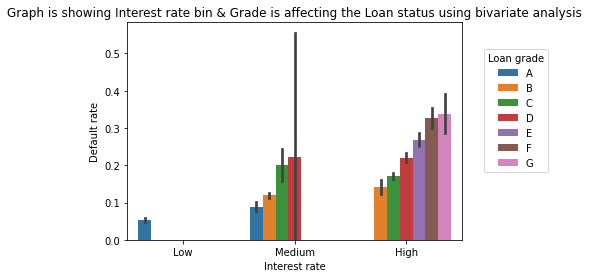

In [131]:
# Bivariate Interest rate bin & Grade with Target variable Loan Status

p = sns.barplot(x = df.int_rate_bin,y=df.loan_status, hue=df.grade.sort_values())
plt.title("Graph is showing Interest rate bin & Grade is affecting the Loan status using bivariate analysis")
plt.xlabel('Interest rate')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Loan grade")
info = get_info_content(p)
dict_info.update({"int_rate_bin + grade": info })
plt.savefig("int_rate_bin + grade")
plt.show()

### Insight:
#### Default rate is < 10% when lower risk grade loans given at low/medium interest rate.

### Recommendation
#### Lower risk grade have been given low or medium interest rate(<12%) this lead to less than 10% default. Hence this practice should be continued.

### x) Annual income and loan amount

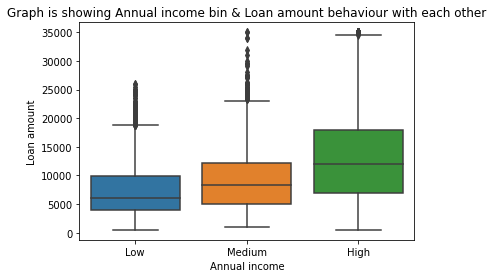

In [132]:

sns.boxplot(x=df.annual_inc_bin, y=df.loan_amnt)
plt.title("Graph is showing Annual income bin & Loan amount behaviour with each other")
plt.xlabel('Annual income')
plt.ylabel("Loan amount")
plt.show()

### We see that people with higher annual income aplly for higher amount of loans.
### Now lets see how they relate with default rate.

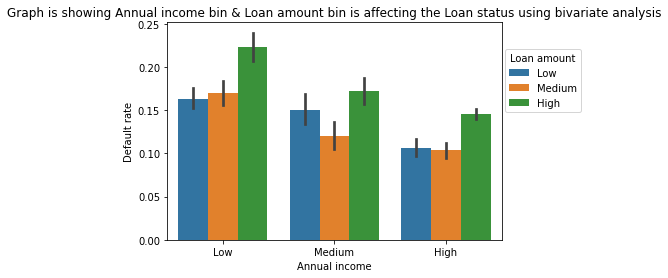

In [133]:
# Bivariate Annual income bin & Loan amount bin with Target variable Loan Status

p = sns.barplot(x = df.annual_inc_bin,y=df.loan_status, hue=df.loan_amnt_bin)
plt.title("Graph is showing Annual income bin & Loan amount bin is affecting the Loan status using bivariate analysis")
plt.xlabel('Annual income')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.25,0.9), title = "Loan amount")
info = get_info_content(p)
dict_info.update({"annual_inc_bin + loan_amnt_bin": info })
plt.savefig("annual_inc_bin + loan_amnt_bin.jpg")
plt.show()

### Insight:
#### We see that people with low annual income default more amomg all categories of loan amount.
#### Low income with high loan amount lead to default rate >20%.

### Recommendation:
#### Hence people with low annual income should be given only low or medium amount of loan.

### xi) Annual income and interest rate

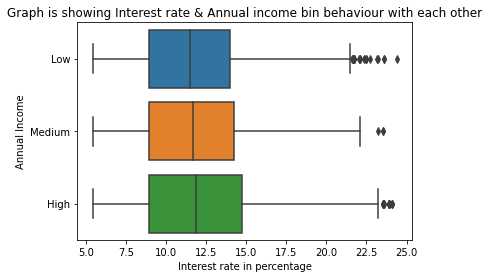

In [134]:
sns.boxplot(x=df.int_rate, y=df.annual_inc_bin)
plt.title("Graph is showing Interest rate & Annual income bin behaviour with each other")
plt.xlabel('Interest rate in percentage')
plt.ylabel("Annual Income")
plt.show()

### We see that interest rate doesnt depend soley on annual income.

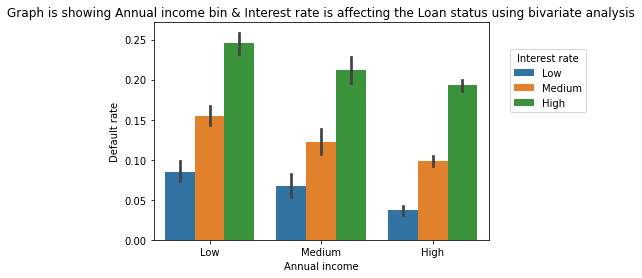

In [135]:
# Bivariate Annual income bin & Interest rate with Target variable Loan Status

p = sns.barplot(x = df.annual_inc_bin,y=df.loan_status, hue=df.int_rate_bin)
plt.title("Graph is showing Annual income bin & Interest rate is affecting the Loan status using bivariate analysis")
plt.xlabel('Annual income')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Interest rate")
info = get_info_content(p)
dict_info.update({"annual_inc_bin + int_rate_bin": info })
plt.savefig("annual_inc_bin + int_rate_bin")
plt.show()

### Insight:
#### We see that low annual income at high interest rate lead to higher default.

### Recommendation:
#### Hence people with low income should only be charged low or medium interest rate.
#### Borrowers  with high annual income(>5 lakh) can be  charged at lower interest rate(<8%) as default rate is close to 3% only.

### xii) Annual income purpose

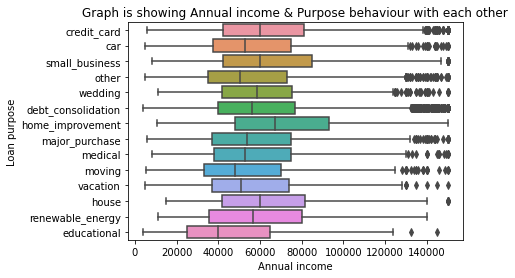

In [136]:
sns.boxplot(x=df_2.annual_inc, y=df_2.purpose)
plt.title("Graph is showing Annual income & Purpose behaviour with each other")
plt.xlabel('Annual income')
plt.ylabel("Loan purpose")
plt.show()

### We see that people with higher income take loans for purposes like home improvement while those with low income take for purposes like education.

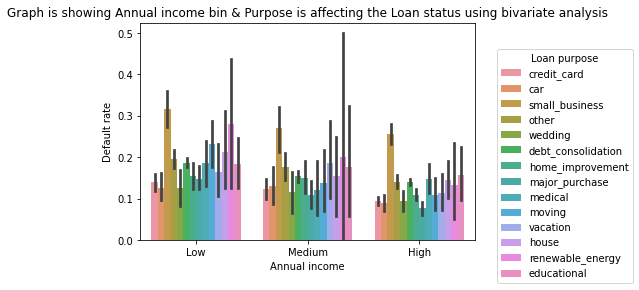

In [137]:
# Bivariate Annual income bin & Purpose with Target variable Loan Status

p = sns.barplot(x = df.annual_inc_bin,y=df.loan_status, hue=df.purpose)
plt.title("Graph is showing Annual income bin & Purpose is affecting the Loan status using bivariate analysis")
plt.xlabel('Annual income')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title = "Loan purpose")
info = get_info_content(p)
dict_info.update({"annual_inc_bin + purpose": info })
plt.savefig("annual_inc_bin + purpose")
plt.show()

### Insight:
#### We see that default rate is high(> 30%) when low income people are given loan for small business.

### Recommendation:
#### Hence this combination should be avoided and small business loans should be given to people with medium or high income.

### xiii) Loan amount and no of public bankruptcies

In [138]:
df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

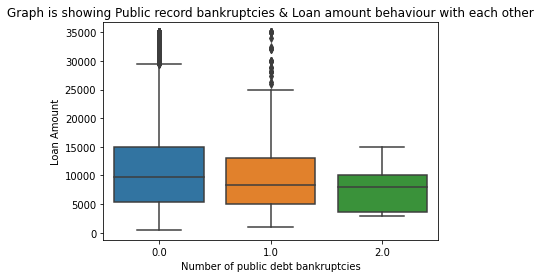

In [139]:
sns.boxplot(x= df.pub_rec_bankruptcies,y=df.loan_amnt)

plt.title("Graph is showing Public record bankruptcies & Loan amount behaviour with each other")
plt.xlabel('Number of public debt bankruptcies')
plt.ylabel("Loan Amount")
plt.show()

### We see that higher loan amounts are given for people with lower public bankruptcies.

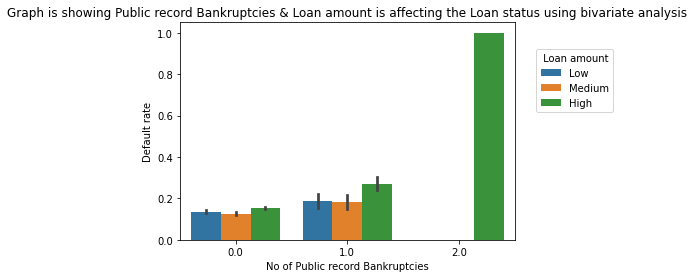

In [140]:
# Bivariate Public record Bankruptcies & Loan amount with Target variable Loan Status

p = sns.barplot(x = df.pub_rec_bankruptcies,y=df.loan_status, hue=df.loan_amnt_bin)
plt.title("Graph is showing Public record Bankruptcies & Loan amount is affecting the Loan status using bivariate analysis")
plt.xlabel('No of Public record Bankruptcies')
plt.ylabel("Default rate")
plt.legend(bbox_to_anchor = (1.05,0.9), title =" Loan amount" )

info = get_info_content(p)
dict_info.update({"pub_rec_bankruptcies + loan_amnt_bin": info })
plt.savefig("pub_rec_bankruptcies + loan_amnt_bin.jpg")

### Insight:
#### Default rate is high when people with higher public bankruptcies are given higher loan amounts.

### Recommendation:
#### So to reduce default rate, people with higher public bankruptcies should be given only low loan amounts.

# Information Content Analysis

In Information content analysis, we will see which features have highest impact on default rate
and these should get higher priority.

Now lets see the information content dictionary that was updated using results from the analysis.

In [141]:
# Convert info content dicionary to data frame
df_info = pd.DataFrame(list(dict_info.items()))
df_info.rename(columns = {0:"Feature",1: "Info content"},inplace = True)
# extract difference , high and low values
df_info["diff"] = df_info["Info content"].apply(lambda x: x[0])
df_info["max"] = df_info["Info content"].apply(lambda x: x[1])
df_info["min"] = df_info["Info content"].apply(lambda x: x[2])
df_info

,Feature,Info content,diff,max,min
0,Loan amount,"(0.03, 0.16, 0.13)",0.03,0.16,0.13
1,term,"(0.14, 0.25, 0.11)",0.14,0.25,0.11
2,Interest rate,"(0.16, 0.21, 0.05)",0.16,0.21,0.05
3,Grade,"(0.28, 0.34, 0.06)",0.28,0.34,0.06
4,sub_grade,"(0.45, 0.48, 0.03)",0.45,0.48,0.03
5,Employment length,"(0.03, 0.16, 0.13)",0.03,0.16,0.13
6,annual_inc,"(0.05, 0.18, 0.13)",0.05,0.18,0.13
7,zip_code,"(0.03, 0.16, 0.13)",0.03,0.16,0.13
8,purpose,"(0.17, 0.27, 0.1)",0.17,0.27,0.10
9,verification status,"(0.04, 0.17, 0.13)",0.04,0.17,0.13


 The "max" column shows the maximum default rate in that feature while the "min" column shows the minimum default rate amomg all categories in that feature. The "diff" column shows the difference between maximum and minimum default rate in that feature.
 
Higher the "diff" column, higher is the impact of that feature on default rate and hence can be used to find driving factors of loan default.
 
 Lets see some top driving factors.

In [142]:
# Slice required fields
df_2 = df_info.loc[:, ["Feature","diff"]]
# sort and show top 10 difference value columns
df_2.sort_values("diff",ascending=False, inplace = True)
df_2.iloc[:10,:]

,Feature,diff
29,pub_rec_bankruptcies + loan_amnt_bin,1.00
4,sub_grade,0.45
20,loan_amnt_bin + grade,0.45
22,term + purpose,0.36
25,int_rate_bin + grade,0.34
19,int_rate_bin + purpose,0.31
12,emp_title,0.28
3,Grade,0.28
28,annual_inc_bin + purpose,0.24
24,int_rate_bin + term,0.23


So we see some of the top impact features on loan defaults are: 
1) Combination of no of public bankruptcies and loan amount
2) Grade with loan amount
3) Sub grade

Note here that though  emp_title has high value but no of samples of each category is low and hence 
it is not taken into consideration.

Now let us see top features with maximum default rates

In [143]:
df_info.sort_values("max",ascending=False)

,Feature,Info content,diff,max,min
29,pub_rec_bankruptcies + loan_amnt_bin,"(1.0, 1.0, 0.0)",1.00,1.00,0.00
20,loan_amnt_bin + grade,"(0.45, 0.5, 0.05)",0.45,0.50,0.05
4,sub_grade,"(0.45, 0.48, 0.03)",0.45,0.48,0.03
22,term + purpose,"(0.36, 0.44, 0.08)",0.36,0.44,0.08
3,Grade,"(0.28, 0.34, 0.06)",0.28,0.34,0.06
25,int_rate_bin + grade,"(0.34, 0.34, 0.0)",0.34,0.34,0.00
19,int_rate_bin + purpose,"(0.31, 0.33, 0.02)",0.31,0.33,0.02
28,annual_inc_bin + purpose,"(0.24, 0.32, 0.08)",0.24,0.32,0.08
21,term + annual_inc_bin,"(0.23, 0.32, 0.09)",0.23,0.32,0.09
12,emp_title,"(0.28, 0.31, 0.03)",0.28,0.31,0.03


In [144]:
# sort and show top 10 max value columns
df_2 = df_info.loc[:, ["Feature","max"]]
df_2.sort_values("max",ascending=False, inplace = True)
df_2.iloc[:10,:]

,Feature,max
29,pub_rec_bankruptcies + loan_amnt_bin,1.00
20,loan_amnt_bin + grade,0.50
4,sub_grade,0.48
22,term + purpose,0.44
3,Grade,0.34
25,int_rate_bin + grade,0.34
19,int_rate_bin + purpose,0.33
28,annual_inc_bin + purpose,0.32
21,term + annual_inc_bin,0.32
12,emp_title,0.31


These feature combinations should also be kept in mind as some of their categories have very
high default rate.
For example,  one of categories of combination of no of public bankruptcies and loan amount
shows max of value 1 ie 100% default rate. This is combination of high loan amount and 2 public bankruptcies 
and this combination should be avoided.


Next lets see features with lowest minimum values.

In [145]:
# sort and show top 10 min value columns
df_2 = df_info.loc[:, ["Feature","min"]]
df_2.sort_values("min", inplace = True)
df_2.iloc[:10,:]

,Feature,min
29,pub_rec_bankruptcies + loan_amnt_bin,0.00
25,int_rate_bin + grade,0.00
19,int_rate_bin + purpose,0.02
12,emp_title,0.03
4,sub_grade,0.03
17,int_rate + loan_amnt_bin,0.04
27,annual_inc_bin + int_rate_bin,0.04
24,int_rate_bin + term,0.05
20,loan_amnt_bin + grade,0.05
2,Interest rate,0.05


Note here that combinations with min value of 0 are due to lack of data samples in that combination.
For example, medium loan amount and 2 public bankruptcies. Hence these should not be mistaken as
zero default rate and should be neglected.

These feature combinations are some of whose categories have very low default rate.
For example,  one of categories of combination of loan purpose and interest rate (low interest rate 
< 8% and purpose of credit card)shows min of value 0.02 ie 2% default rate. 
Hence these combinations should be promoted as it can increase business of lending club.




# Recommendations

Using the insights from analysis we can propose the following recommendations.

#### 1) Higher risk grades(above E) should be avoided as they have higher chance of defaulting. moving from grade E to B reduce default rate by 12%. Grades F and G strictly to be avoidedas default rate is above 30%.

#### 2) Within a grade, low risk subgrade should be preferred.For example, moving from D4 to D1 reduce default rate by 5%.

#### 3) High loan amounts (> 35k)in risky grades should be strictly avoided as they have one of the highest rate of default.For example, high loan amounts t to grade F result in default rate  of more than 30%.

#### 4) High loan amounts (>35k) should preferably not be given to people with multiple public bankruptcies as this combination leads to one of highest default rate. For example, high loan amounts to people of one public bankruptcy gave close to 30% defaultrate while all those with two public bankruptcies defaulted.

#### 5) Among purposes, small business loans should be restricted (>25% default rate) and promote low defaulting purposes like credit card and car(close to 10% default rate)

#### 6) Among purpose, high loan amounts(>35k) should be restricted in small business loans category as default rate is close to 30%.
 
#### 7) Loans at higher interest rate have higher chance of defaulting. Interest rate till 12% is acceptable but anything above %12 should be restricted as it result in default rate of20%. But this can reduce profits from interest receipts hence as a tradeoff medium interest rate of 8-12% can be suggested which have considerably lower 11% default rate. 

#### 8) People with zero derogatory public record should be preferred and those with even one maybe avoided as their default rate is 22%. 

#### 9) Borrowers with higher debt to income ratio are more likely to default (about 17%). Hence loans be approved only for people with low debt to income in range less than 10% dti.

#### 10) Loans at shorter term(3 years) should be preferred over longer term. This is because for loans at higher term ,default rate is almost 15% more than those of shorter term. Hence the term of 36 months should be given as default option to reduce loans in 60 months term.

#### 11) Longer term loans (5 years)  should be avoided also for borrowers with lower annual income of less than 40k as they result in default rate of 32%.

#### 12) Lower risk grade have been given low or medium interest rate(<12%) this lead to less than 10% default. Hence this practice should be continued.

#### 13) Purposes like credit card and wedding can be  charged at  medium interest rate(8-12 %) can increase business as default rate is less than 10%.If priority is to reduce default rate over higherinterest payments  then we can charge low interest rate (<8%) as default rate is less than 5% for these categories at low interest rate.

#### 14) Borrowers  with high annual income(>5 lakh) can be  charged at lower interest rate(<8%) as default rate is close to 3% only.

#### 15) To to reduce default rate in high loan amounts (>35k) should be given at low interest rate(<8%) as default rate is low and less than 5%. 